In [2]:
import os 
os.chdir("/home/canyon/Bus-Weather-Impacts/")
from src.utils import *
import pandas as pd
import os
import osmnx as ox
import geopandas as gpd
import networkx as nx
from sklearn.neighbors import KDTree
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filtered_df = pd.read_parquet('/home/data/bus-weather/raw_bus_gtfs_rt_202230917_20230930.parquet')

In [4]:
place = "New York City, New York, USA"
G = ox.graph_from_place(place, network_type='drive')
ox.save_graphml(G,filepath='/home/data/bus-weather/NYC_drive_graph.graphml')
# Convert graph nodes to a DataFrame for KDTree


PermissionError: [Errno 13] Permission denied: '/home/data/bus-weather/NYC_drive_graph.graphml'

In [4]:
nodes = ox.graph_to_gdfs(G, edges=False).reset_index()
tree = KDTree(nodes[['y', 'x']], metric='euclidean')

In [5]:
filtered_df['hour'] = filtered_df['vehicle.timestamp'].dt.hour 

In [6]:
filtered_df = filtered_df[(filtered_df.hour >9) & (filtered_df.hour<15)]

In [15]:
filtered_df.hour.value_counts()

hour
12    2589226
11    2402987
13    2225461
14    1932752
10    1552000
Name: count, dtype: int64

In [7]:
pre_rain = filtered_df[filtered_df['vehicle.timestamp'] < '2023-09-28']
pre_rain['tag'] = 'pre_rain'
rain = filtered_df[(filtered_df['vehicle.timestamp'] > '2023-09-29') & (filtered_df['vehicle.timestamp'] < '2023-09-30')]
rain['tag'] = 'rain'

df = pd.concat([pre_rain, rain])

/tmp/ipykernel_16021/1276840483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_rain['tag'] = 'pre_rain'
/tmp/ipykernel_16021/1276840483.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain['tag'] = 'rain'


In [26]:
df.head()

id             vehicle.trip.trip_id vehicle.trip.start_date  \
53309  MTA NYCT_5557  GH_D3-Saturday-056400_SBS41_959                20230916   
53310  MTA NYCT_5591  MQ_D3-Saturday-056300_SBS86_963                20230916   
53311  MTA NYCT_5590  MQ_D3-Saturday-057500_SBS14_705                20230916   
53312   MTA NYCT_310   WF_D3-Saturday-056100_BX11_210                20230916   
53313  MTA NYCT_5592   MQ_D3-Saturday-058200_SB79_656                20230916   

      vehicle.trip.route_id  vehicle.trip.direction_id  \
53309                 BX41+                        1.0   
53310                  M86+                        0.0   
53311                 M14A+                        1.0   
53312                  BX11                        1.0   
53313                  M79+                        0.0   

       vehicle.position.latitude  vehicle.position.longitude  \
53309                  40.847202                  -73.901215   
53310                  40.779236                  -73.945107   
53311                  40.718639                  -73.988152   
53312                  40.838139                  -73.901085   
53313                  40.783699                  -73.977913   

       vehicle.position.bearing   vehicle.timestamp vehicle.stop_id  \
53309                239.931412 2023-09-16 13:44:16          102819   
53310                157.474228 2023-09-16 13:44:28          403383   
53311                 62.458412 2023-09-16 13:44:30          403732   
53312                155.924500 2023-09-16 13:44:43          100764   
53313                 53.130104 2023-09-16 13:44:32          401867   

      vehicle.vehicle.id  hour       tag  
53309      MTA NYCT_5557    13  pre_rain  
53310      MTA NYCT_5591    13  pre_rain  
53311      MTA NYCT_5590    13  pre_rain  
53312       MTA NYCT_310    13  pre_rain  
53313      MTA NYCT_5592    13  pre_rain

In [41]:
df[df['vehicle.trip.trip_id']=='GH_D3-Saturday-056400_SBS41_959']

id             vehicle.trip.trip_id  \
53309     MTA NYCT_5557  GH_D3-Saturday-056400_SBS41_959   
55068     MTA NYCT_5557  GH_D3-Saturday-056400_SBS41_959   
56832     MTA NYCT_5557  GH_D3-Saturday-056400_SBS41_959   
58615     MTA NYCT_5557  GH_D3-Saturday-056400_SBS41_959   
60395     MTA NYCT_5557  GH_D3-Saturday-056400_SBS41_959   
...                 ...                              ...   
14134734  MTA NYCT_5557  GH_D3-Saturday-056400_SBS41_959   
14136478  MTA NYCT_5557  GH_D3-Saturday-056400_SBS41_959   
14138223  MTA NYCT_5557  GH_D3-Saturday-056400_SBS41_959   
14139966  MTA NYCT_5557  GH_D3-Saturday-056400_SBS41_959   
14141710  MTA NYCT_5557  GH_D3-Saturday-056400_SBS41_959   

         vehicle.trip.start_date vehicle.trip.route_id  \
53309                   20230916                 BX41+   
55068                   20230916                 BX41+   
56832                   20230916                 BX41+   
58615                   20230916                 BX41+   
60395                   20230916                 BX41+   
...                          ...                   ...   
14134734                20230916                 BX41+   
14136478                20230916                 BX41+   
14138223                20230916                 BX41+   
14139966                20230916                 BX41+   
14141710                20230916                 BX41+   

          vehicle.trip.direction_id  vehicle.position.latitude  \
53309                           1.0                  40.847202   
55068                           1.0                  40.847168   
56832                           1.0                  40.843891   
58615                           1.0                  40.842304   
60395                           1.0                  40.839294   
...                             ...                        ...   
14134734                        1.0                  40.868603   
14136478                        1.0                  40.866455   
14138223                        1.0                  40.865620   
14139966                        1.0                  40.863857   
14141710                        1.0                  40.862633   

          vehicle.position.longitude  vehicle.position.bearing  \
53309                     -73.901215                239.931412   
55068                     -73.901237                239.931412   
56832                     -73.903069                241.606979   
58615                     -73.903954                244.653824   
60395                     -73.905624                244.536652   
...                              ...                       ...   
14134734                  -73.881462                209.054611   
14136478                  -73.885010                209.659103   
14138223                  -73.886497                212.471191   
14139966                  -73.888596                221.877869   
14141710                  -73.890144                218.290161   

           vehicle.timestamp vehicle.stop_id vehicle.vehicle.id  hour  \
53309    2023-09-16 13:44:16          102819      MTA NYCT_5557    13   
55068    2023-09-16 13:45:17          102819      MTA NYCT_5557    13   
56832    2023-09-16 13:46:18          102819      MTA NYCT_5557    13   
58615    2023-09-16 13:47:49          102819      MTA NYCT_5557    13   
60395    2023-09-16 13:48:19          902119      MTA NYCT_5557    13   
...                      ...             ...                ...   ...   
14134734 2023-09-16 13:33:36          102946      MTA NYCT_5557    13   
14136478 2023-09-16 13:34:36          102806      MTA NYCT_5557    13   
14138223 2023-09-16 13:35:37          102806      MTA NYCT_5557    13   
14139966 2023-09-16 13:36:38          102806      MTA NYCT_5557    13   
14141710 2023-09-16 13:37:39          102806      MTA NYCT_5557    13   

               tag  nearest_node  nearest_osm_id  
53309     pre_rain         17104        42764761  
55068     pre_rain         17104      

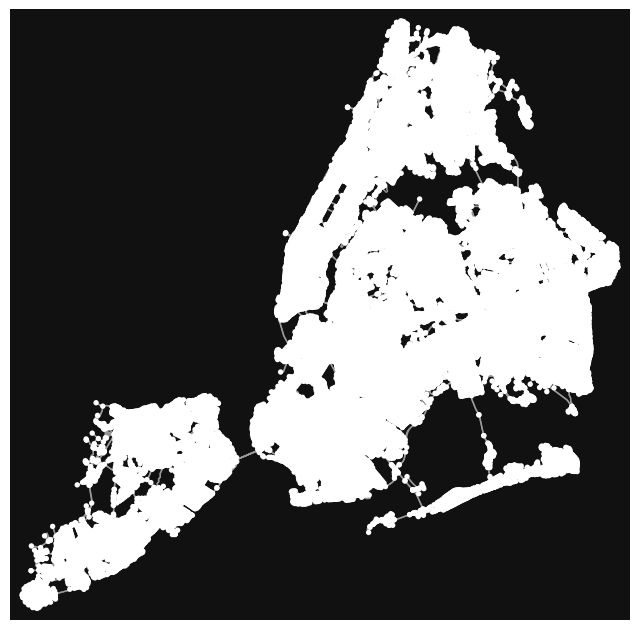

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [4]:
ox.plot_graph(G)

In [22]:
del(filtered_df)

In [8]:
# Query the KDTree for nearest node to each point
nearest_nodes = tree.query(np.array(df[['vehicle.position.latitude', 'vehicle.position.longitude']]), k=1, return_distance=False)
df['nearest_node'] = nearest_nodes.flatten()

# Map node IDs to OSM IDs
df['nearest_osm_id'] = df['nearest_node'].map(nodes['osmid'])
buses = df.merge(nodes, left_on = "nearest_osm_id", right_on = "osmid")
buses = gpd.GeoDataFrame(buses, geometry='geometry')

In [9]:
buses_with_nodes = buses.sort_values(["vehicle.trip.trip_id", "vehicle.timestamp"]).drop_duplicates(subset = ["vehicle.trip.trip_id", "nearest_osm_id"],  keep = "first").to_crs(2263)
buses_with_nodes = buses_with_nodes[["vehicle.trip.route_id", "vehicle.timestamp", "vehicle.trip.trip_id", "osmid", "vehicle.vehicle.id",  "geometry","hour","tag"]]
buses_with_nodes["prev_osmid"] = buses_with_nodes.groupby("vehicle.trip.trip_id")["osmid"].shift()

In [ ]:
# def compute_distance(row, graph):
#     try:
#         return nx.shortest_path_length(graph, row['prev_osmid'], row['osmid'], weight='length')
#     except nx.NetworkXNoPath:
#         return float('nan')
    
# def compute_euclid_dists(node_pairs, nodes_points):
#     node_pairs = node_pairs.merge(nodes_points, left_on = "osmid", right_on = "osmid", how = "left").merge(nodes_points, right_on = "osmid", left_on = "prev_osmid", how = "left", suffixes = ["curr", "prev"])
#     node_pairs["x_diff_sq"] = (node_pairs["xcurr"] - node_pairs["xprev"])**2
#     node_pairs["y_diff_sq"] = (node_pairs["ycurr"] - node_pairs["yprev"])**2

#     return (node_pairs["x_diff_sq"] + node_pairs["y_diff_sq"]) ** (1/2)

# nodes_points = nodes.to_crs(2263)
# nodes_points["x"] = nodes_points.geometry.x
# nodes_points["y"] = nodes_points.geometry.y
# nodes_points = nodes_points[["osmid", "x", "y"]]

# unqiue_node_pairs = buses_with_nodes[["osmid", "prev_osmid"]].dropna().drop_duplicates().astype("Int64").reset_index()
# unqiue_node_pairs["distance_meters_osm"] = unqiue_node_pairs.apply(compute_distance, graph=G, axis=1)
# unqiue_node_pairs["distance_meters_euclid"] = compute_euclid_dists(unqiue_node_pairs, nodes_points) / 3.28

# unqiue_node_pairs.to_parquet("/home/data/bus-weather/node_pairs_v2.parquet")



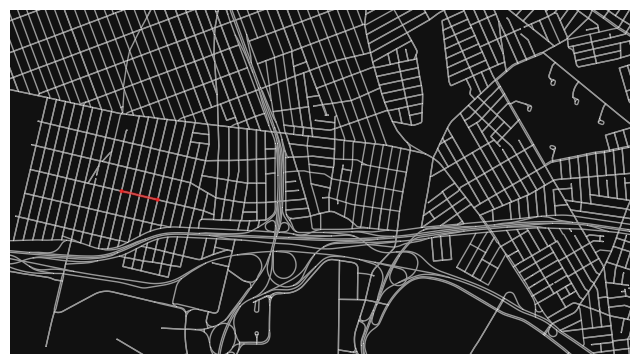

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [120]:
ox.plot.plot_graph_route(G,[42878414, 42878420, 42878423, 42837155, 42878427],node_size=0.5,route_linewidth=2,orig_dest_size=10,bbox=(40.683742,40.657426,-73.765928, -73.828438))


In [129]:
a = nx.shortest_path(G,42878427,42878414)

In [130]:
a

[42878427, 42837155, 42878423, 42878420, 42878414]

In [132]:
[1]*len(a)

[1, 1, 1, 1, 1]

In [131]:
osmids = a[1:len(a)]
prev_osmids = a[0:len(a)-1]

pd.DataFrame(data={'from':prev_osmids,'to':osmids})

osmid  prev_osmid
0  42837155    42878427
1  42878423    42837155
2  42878420    42878423
3  42878414    42878420

In [10]:
unique_node_pairs = pd.read_parquet("/home/data/bus-weather/node_pairs.parquet")
buses_with_nodes = buses_with_nodes.merge(unique_node_pairs, how = "left")
buses_with_nodes["osmid"] = buses_with_nodes["osmid"].astype(str)
buses_with_nodes["prev_osmid"] = buses_with_nodes["prev_osmid"].astype("Int64").astype(str)

In [11]:
buses_with_nodes["time_diff_seconds"] = buses_with_nodes.groupby("vehicle.trip.trip_id")["vehicle.timestamp"].diff().dt.total_seconds()
buses_with_nodes["speed_mph_osm"] =  (buses_with_nodes["distance_meters_osm"] / 1609) / (buses_with_nodes["time_diff_seconds"] / 3600)
buses_with_nodes["speed_mph_euclid"] =  (buses_with_nodes["distance_meters_euclid"] / 1609) / (buses_with_nodes["time_diff_seconds"] / 3600)

In [46]:
buses_with_nodes.head()

vehicle.trip.route_id   vehicle.timestamp             vehicle.trip.trip_id  \
0                  QM18 2023-09-25 10:38:34  37370701-FRPD3-FR_D3-Weekday-04   
1                  QM18 2023-09-25 10:40:36  37370701-FRPD3-FR_D3-Weekday-04   
2                  QM18 2023-09-25 10:41:37  37370701-FRPD3-FR_D3-Weekday-04   
3                  QM18 2023-09-25 10:42:38  37370701-FRPD3-FR_D3-Weekday-04   
4                  QM18 2023-09-25 10:43:39  37370701-FRPD3-FR_D3-Weekday-04   

      osmid vehicle.vehicle.id                        geometry  hour  \
0  42878427         MTABC_3319  POINT (1035975.058 183147.070)    10   
1  42878414         MTABC_3319  POINT (1034961.741 183384.299)    10   
2  42878389         MTABC_3319  POINT (1033939.562 183624.102)    10   
3  42890666         MTABC_3319  POINT (1034095.217 184284.949)    10   
4  42837698         MTABC_3319  POINT (1034396.876 185660.622)    10   

        tag prev_osmid       index  distance_meters_osm  \
0  pre_rain       <NA>         NaN                  NaN   
1  pre_rain   42878427  15428226.0              316.506   
2  pre_rain   42878414   7803866.0              319.274   
3  pre_rain   42878389   7026413.0              207.171   
4  pre_rain   42890666  11313659.0              431.224   

   distance_meters_euclid  time_diff_seconds  speed_mph_osm  speed_mph_euclid  
0                     NaN                NaN            NaN               NaN  
1              317.291285              122.0       5.804550          5.818952  
2              320.101001               61.0      11.710628         11.740961  
3              206.991340               61.0       7.598810          7.592220  
4              429.377506               61.0      15.816834         15.749106

In [39]:
buses_with_nodes.head()

vehicle.trip.route_id   vehicle.timestamp             vehicle.trip.trip_id  \
0                  QM18 2023-09-25 10:38:34  37370701-FRPD3-FR_D3-Weekday-04   
1                  QM18 2023-09-25 10:40:36  37370701-FRPD3-FR_D3-Weekday-04   
2                  QM18 2023-09-25 10:41:37  37370701-FRPD3-FR_D3-Weekday-04   
3                  QM18 2023-09-25 10:42:38  37370701-FRPD3-FR_D3-Weekday-04   
4                  QM18 2023-09-25 10:43:39  37370701-FRPD3-FR_D3-Weekday-04   

      osmid vehicle.vehicle.id                        geometry prev_osmid  \
0  42878427         MTABC_3319  POINT (1035975.058 183147.070)       <NA>   
1  42878414         MTABC_3319  POINT (1034961.741 183384.299)   42878427   
2  42878389         MTABC_3319  POINT (1033939.562 183624.102)   42878414   
3  42890666         MTABC_3319  POINT (1034095.217 184284.949)   42878389   
4  42837698         MTABC_3319  POINT (1034396.876 185660.622)   42890666   

        index  distance_meters_osm  distance_meters_euclid  time_diff_seconds  \
0         NaN                  NaN                     NaN                NaN   
1  15428226.0              316.506              317.291285              122.0   
2   7803866.0              319.274              320.101001               61.0   
3   7026413.0              207.171              206.991340               61.0   
4  11313659.0              431.224              429.377506               61.0   

   speed_mph_osm  speed_mph_euclid  
0            NaN               NaN  
1       5.804550          5.818952  
2      11.710628         11.740961  
3       7.598810          7.592220  
4      15.816834         15.749106

In [12]:
buses_with_nodes = buses_with_nodes[(~buses_with_nodes.speed_mph_osm.isna()) & (~buses_with_nodes.speed_mph_euclid.isna())]

In [13]:
buses_with_nodes = buses_with_nodes.reset_index()

In [14]:
buses_with_nodes.head()

level_0 vehicle.trip.route_id   vehicle.timestamp  \
0        1                  QM18 2023-09-25 10:40:36   
1        2                  QM18 2023-09-25 10:41:37   
2        3                  QM18 2023-09-25 10:42:38   
3        4                  QM18 2023-09-25 10:43:39   
4        5                  QM18 2023-09-25 10:44:40   

              vehicle.trip.trip_id     osmid vehicle.vehicle.id  \
0  37370701-FRPD3-FR_D3-Weekday-04  42878414         MTABC_3319   
1  37370701-FRPD3-FR_D3-Weekday-04  42878389         MTABC_3319   
2  37370701-FRPD3-FR_D3-Weekday-04  42890666         MTABC_3319   
3  37370701-FRPD3-FR_D3-Weekday-04  42837698         MTABC_3319   
4  37370701-FRPD3-FR_D3-Weekday-04  42890780         MTABC_3319   

                         geometry  hour       tag prev_osmid       index  \
0  POINT (1034961.741 183384.299)    10  pre_rain   42878427  15428226.0   
1  POINT (1033939.562 183624.102)    10  pre_rain   42878414   7803866.0   
2  POINT (1034095.217 184284.949)    10  pre_rain   42878389   7026413.0   
3  POINT (1034396.876 185660.622)    10  pre_rain   42890666  11313659.0   
4  POINT (1034277.311 185977.269)    10  pre_rain   42837698   8176661.0   

   distance_meters_osm  distance_meters_euclid  time_diff_seconds  \
0              316.506              317.291285              122.0   
1              319.274              320.101001               61.0   
2              207.171              206.991340               61.0   
3              431.224              429.377506               61.0   
4              103.279              103.191787               61.0   

   speed_mph_osm  speed_mph_euclid  
0       5.804550          5.818952  
1      11.710628         11.740961  
2       7.598810          7.592220  
3      15.816834         15.749106  
4       3.788163          3.784964

In [15]:
buses_with_nodes.shape

(2303025, 16)

In [17]:
def explode_edges(row):
    try:
        nodes = nx.shortest_path(G,int(row['prev_osmid']),int(row['osmid']))
        idxs = [int(row['level_0'])]*(len(nodes)-1)
        osmids = nodes[1:len(nodes)]
        prev_osmids = nodes[0:len(nodes)-1]        
        d = pd.DataFrame(data={'idx':idxs,'from':prev_osmids,'to':osmids})
    except:
        d = pd.DataFrame(data={'idx':[pd.NA],'from':[pd.NA],'to':[pd.NA]})
    
    return d

In [21]:
dfs = []
for i,row in buses_with_nodes.iterrows():
    dfs.append(explode_edges(row))

In [22]:
split_bus_data = pd.concat(dfs)

In [24]:
buses_with_nodes.columns

Index(['level_0', 'vehicle.trip.route_id', 'vehicle.timestamp',
       'vehicle.trip.trip_id', 'osmid', 'vehicle.vehicle.id', 'geometry',
       'hour', 'tag', 'prev_osmid', 'index', 'distance_meters_osm',
       'distance_meters_euclid', 'time_diff_seconds', 'speed_mph_osm',
       'speed_mph_euclid'],
      dtype='object')

In [23]:
split_bus_data.head()

idx      from        to
0    1  42878427  42837155
1    1  42837155  42878423
2    1  42878423  42878420
3    1  42878420  42878414
0    2  42878414  42820367

In [26]:
split_bus_data = split_bus_data.merge(buses_with_nodes[['level_0', 'vehicle.trip.route_id', 'vehicle.timestamp',
       'vehicle.trip.trip_id',
       'hour', 'tag', 'distance_meters_osm',
       'distance_meters_euclid', 'time_diff_seconds', 'speed_mph_osm',
       'speed_mph_euclid']],how='left',left_on='idx',right_on='level_0')

In [27]:
split_bus_data.head()

idx      from        to  level_0 vehicle.trip.route_id   vehicle.timestamp  \
0    1  42878427  42837155        1                  QM18 2023-09-25 10:40:36   
1    1  42837155  42878423        1                  QM18 2023-09-25 10:40:36   
2    1  42878423  42878420        1                  QM18 2023-09-25 10:40:36   
3    1  42878420  42878414        1                  QM18 2023-09-25 10:40:36   
4    2  42878414  42820367        2                  QM18 2023-09-25 10:41:37   

              vehicle.trip.trip_id  hour       tag  distance_meters_osm  \
0  37370701-FRPD3-FR_D3-Weekday-04    10  pre_rain              316.506   
1  37370701-FRPD3-FR_D3-Weekday-04    10  pre_rain              316.506   
2  37370701-FRPD3-FR_D3-Weekday-04    10  pre_rain              316.506   
3  37370701-FRPD3-FR_D3-Weekday-04    10  pre_rain              316.506   
4  37370701-FRPD3-FR_D3-Weekday-04    10  pre_rain              319.274   

   distance_meters_euclid  time_diff_seconds  speed_mph_osm  speed_mph_euclid  
0              317.291285              122.0       5.804550          5.818952  
1              317.291285              122.0       5.804550          5.818952  
2              317.291285              122.0       5.804550          5.818952  
3              317.291285              122.0       5.804550          5.818952  
4              320.101001               61.0      11.710628         11.740961

In [160]:
split_bus_data['date'] = split_bus_data['vehicle.timestamp'].dt.day

In [159]:
split_bus_data['vehicle.timestamp'].dt.day

0          25
1          25
2          25
3          25
4          25
           ..
8443435    18
8443436    18
8443437    18
8443438    18
8443439    18
Name: vehicle.timestamp, Length: 7396788, dtype: int32

In [161]:
split_bus_data.date.value_counts()

date
18    1425179
25    1346825
19     927126
16     799759
17     595435
23     520062
20     505755
24     408100
21     302155
22     191293
26     174038
27     117487
29      83574
Name: count, dtype: int64

In [188]:
split_bus_data.columns

Index(['idx', 'from', 'to', 'level_0', 'vehicle.trip.route_id',
       'vehicle.timestamp', 'vehicle.trip.trip_id', 'hour', 'tag',
       'distance_meters_osm', 'distance_meters_euclid', 'time_diff_seconds',
       'speed_mph_osm', 'speed_mph_euclid', 'date'],
      dtype='object')

In [191]:
filtered = split_bus_data[(split_bus_data['date'] == 22)|(split_bus_data['date'] == 29)]
route_summary = filtered[['vehicle.trip.route_id','tag','speed_mph_osm', 'speed_mph_euclid']].groupby(['vehicle.trip.route_id','tag']).median().reset_index()

In [197]:
rs_pr = route_summary[route_summary.tag =='pre_rain'].drop(columns=['tag'])
rs_r = route_summary[route_summary.tag =='rain'].rename(columns={'speed_mph_osm':'speed_mph_osm_rain','speed_mph_euclid':'speed_mph_euclid_rain'}).drop(columns=['tag'])
route_summary = rs_pr.merge(rs_r)

In [198]:
route_summary['speed_ratio_osm'] = route_summary.speed_mph_osm_rain/route_summary.speed_mph_osm
route_summary['speed_ratio_euclid'] = route_summary.speed_mph_euclid_rain/route_summary.speed_mph_euclid

In [203]:
route_summary.describe()

speed_mph_osm  speed_mph_euclid  speed_mph_osm_rain  \
count     331.000000        331.000000          331.000000   
mean       10.712744          8.326899           10.419774   
std         7.653162          5.096581            8.458273   
min         0.018549          0.012339            0.000540   
25%         6.132989          5.631074            5.460025   
50%         8.600842          7.063599            8.194928   
75%        13.643152         10.316542           13.648691   
max        49.264251         33.773821           42.483170   

       speed_mph_euclid_rain  speed_ratio_osm  speed_ratio_euclid  
count             331.000000       331.000000          331.000000  
mean                7.136217         2.671746            2.793104  
std                 4.889113        14.506309           18.891731  
min                 0.000498         0.000079            0.000264  
25%                 4.217684         0.682567            0.600820  
50%                 6.697599         0.949428            0.885427  
75%                 9.670559         1.164799            1.083406  
max                25.940322       208.075368          313.206851

In [217]:
route_summary[(route_summary.speed_mph_euclid>5)&(route_summary.speed_ratio_euclid>0.35)].sort_values('speed_ratio_euclid').head(20)

vehicle.trip.route_id  speed_mph_osm  speed_mph_euclid  \
33                    B48       5.883188          5.734890   
89                   BX36       8.185979          5.571028   
256                  QM34      22.332625         21.014072   
109                  BXM2      14.585979         11.116601   
49                    B70       7.268707          5.839862   
260                  QM40      25.600644         24.518915   
277                   S56      16.706017         15.271752   
80                   BX28       7.053932          7.040100   
250                  QM21      30.608046         16.370642   
101                  BX6+       7.217693          5.410234   
63                   BX11       7.821478          5.573449   
214                   Q48      14.452691          7.083760   
301                 SIM22      33.963769         22.078608   
313                 SIM35      29.504382         22.001687   
134                   M21       8.901554          5.553110   
294                   S98      14.442632         13.247789   
50                     B8       5.956108          5.805716   
265                   QM7      22.874244         14.639974   
40                    B61       6.804748          5.899880   
308                 SIM31      29.451376         20.672437   

     speed_mph_osm_rain  speed_mph_euclid_rain  speed_ratio_osm  \
33             8.023269               2.184080         1.363762   
89             6.024709               2.185079         0.735979   
256           20.826526               8.277495         0.932561   
109            7.210429               4.432887         0.494340   
49             2.898025               2.394977         0.398699   
260           11.528036              10.669034         0.450303   
277           14.301879               6.984088         0.856091   
80             3.728390               3.244471         0.528555   
250           23.413698               7.577240         0.764952   
101            2.806506               2.561747         0.388837   
63             6.558111               2.661643         0.838475   
214            9.325013               3.394704         0.645209   
301           14.748633              10.637579         0.434246   
313           25.683593              10.813900         0.870501   
134            7.620216               2.770447         0.856055   
294            6.689882               6.697599         0.463204   
50             5.836263               2.952218         0.979879   
265           13.312500               7.692309         0.581986   
40             3.948716               3.122418         0.580288   
308           21.911867              11.326923         0.744001   

     speed_ratio_euclid  
33             0.380841  
89             0.392222  
256            0.393902  
109            0.398763  
49             0.410108  
260            0.435135  
277            0.457321  
80             0.460856  
250            0.462855  
101            0.473500  
63             0.477558  
214            0.479223  
301            0.481805  
313            0.491503  
134            0.498900  
294            0.505564  
50             0.508502  
265            0.525432  
40             0.529234  
308            0.547924

In [35]:
split_bus_data = split_bus_data[split_bus_data.speed_mph_osm < 60]

In [36]:
split_bus_data.speed_mph_osm.describe()

count    7.396788e+06
mean     1.272730e+01
std      1.111111e+01
min      3.824141e-05
25%      5.774402e+00
50%      9.519008e+00
75%      1.633536e+01
max      5.999970e+01
Name: speed_mph_osm, dtype: float64

In [164]:
avg_segment_speeds = split_bus_data[(split_bus_data['date'] == 22)|(split_bus_data['date'] == 29)][['from','to','tag','speed_mph_osm','speed_mph_euclid']].groupby(['from','to','tag']).median()[['speed_mph_osm','speed_mph_euclid']].reset_index()

In [184]:
avg_segment_speeds

from          to       tag  speed_mph_osm  speed_mph_euclid
0         39076461    42854803  pre_rain       0.155377          0.128933
1         39076461    42854803      rain       0.058170          0.048452
2         39076461   274283981  pre_rain       0.191921          0.182823
3         39076461   274283981      rain       0.072424          0.068072
4         42421728    42421731  pre_rain       0.197116          0.181430
...            ...         ...       ...            ...               ...
77172  11715016008  8697078881      rain      28.752268         24.470532
77173  11715016011    42981287  pre_rain       6.929786          6.894382
77174  11715016011  5490141478  pre_rain       8.752135          8.700931
77175  11728146527    42429390  pre_rain       6.197620          2.513761
77176  11728146527    42429390      rain       0.000255          0.000255

[77177 rows x 5 columns]

In [49]:
avg_speeds_pivot

from          to speed_mph_osm           
tag                                 pre_rain       rain
0         39076461    42854803      0.141228   0.058170
1         39076461   274283981      0.165953   0.072424
2         39076490   277672005      0.032165        NaN
3         39076504   462122450      0.307771        NaN
4         39076504   462124701      0.098817        NaN
...            ...         ...           ...        ...
78434  11715016008  8697078881      9.280625  28.752268
78435  11715016011    42981287      8.405160        NaN
78436  11715016011  5490141478      9.963580        NaN
78437  11728146527    42429390     10.944989   0.000255
78438  11728146527    42436431     15.006266        NaN

[78439 rows x 4 columns]

In [165]:
avg_speeds_pivot = avg_segment_speeds.pivot(index=['from','to'],columns=['tag'],values=['speed_mph_euclid']).reset_index()

In [166]:
avg_speeds_pivot = avg_speeds_pivot[(~avg_speeds_pivot['speed_mph_osm']['rain'].isna()) & (~avg_speeds_pivot['speed_mph_osm']['pre_rain'].isna())]

In [77]:
avg_speeds_pivot['pct_diff'] = (avg_speeds_pivot['speed_mph_osm']['pre_rain'] - avg_speeds_pivot['speed_mph_osm']['rain'])*100/avg_speeds_pivot['speed_mph_osm']['pre_rain']

In [167]:
avg_speeds_pivot

from           to speed_mph_osm           
tag                                  pre_rain       rain
0         39076461     42854803      0.155377   0.058170
1         39076461    274283981      0.191921   0.072424
12        42421745     42428751      4.802890   5.302464
13        42421745   1061531654      0.386808   1.574949
14        42421749     42421745      0.386808   1.574949
...            ...          ...           ...        ...
52088  11715016005   7673779706     11.387037   6.024068
52089  11715016006  10646815574     10.223562   3.192693
52092  11715016008   2896130156      6.867932   6.723606
52093  11715016008   8697078881      8.564566  28.752268
52096  11728146527     42429390      6.197620   0.000255

[25080 rows x 4 columns]

In [100]:
avg_speeds_pivot[['osmid','prev_osmid','pct_diff']]

osmid  prev_osmid   pct_diff
tag                                       
17      10000127469    42952414  48.387097
18      10000127469    42958318  32.608696
25      10000127473    42952414  49.180328
37      10001766726    42740346  -3.333333
115     10039185774  1347130691  48.271649
...             ...         ...        ...
200161   9945359799    42879717 -22.327869
200243   9991778268  4207090355  50.806452
200254   9991778268    42978293  26.304918
200256   9991778268    42978304  50.819672
200271   9991778284    42974867   1.612903

[12346 rows x 3 columns]

In [59]:
nodes,edges_old = ox.graph_to_gdfs(G, edges=True)

In [61]:
edges_old.index

MultiIndex([(   39076461,   42854803, 0),
            (   39076461,  274283981, 0),
            (   39076490,  277672046, 0),
            (   39076490,  277672005, 0),
            (   39076504,  462124701, 0),
            (   39076504,  462122450, 0),
            (   42421728,   42432736, 0),
            (   42421728,   42435337, 0),
            (   42421728,   42421731, 0),
            (   42421731,   42437916, 0),
            ...
            (11715016008, 8697078881, 0),
            (11715016011, 5490141478, 0),
            (11715016011,   42981287, 0),
            (11728146527,   42436431, 0),
            (11728146527,   42429390, 0),
            (11738261732,  447844637, 0),
            (11739504978,   42956144, 0),
            (11739504978,  359874488, 0),
            (11739504978, 5008895822, 0),
            (11741836193,   43011939, 0)],
           names=['u', 'v', 'key'], length=139587)

In [43]:
edges = edges.reset_index()

In [45]:
edges[(edges.u==39076461)|(edges.v==39076461)]

u          v  key                   osmid  oneway  \
0        39076461   42854803    0                25161578    True   
1        39076461  274283981    0   [122633397, 25161349]    True   
111368  274281354   39076461    0  [949727283, 949698763]    True   

              highway reversed   length  \
0       motorway_link    False  254.709   
1            motorway    False  767.800   
111368       motorway    False  807.210   

                                                 geometry lanes  ref  \
0       LINESTRING (-73.79463 40.78641, -73.79361 40.7...   NaN  NaN   
1       LINESTRING (-73.79463 40.78641, -73.79309 40.7...     2   CI   
111368  LINESTRING (-73.80409 40.78613, -73.80341 40.7...     3   CI   

                        name maxspeed bridge access tunnel width junction  \
0                        NaN      NaN    NaN    NaN    NaN   NaN      NaN   
1       Cross Island Parkway   50 mph    NaN    NaN    NaN   NaN      NaN   
111368  Cross Island Parkway   50 mph    NaN    NaN    NaN   NaN      NaN   

       est_width  
0            NaN  
1            NaN  
111368       NaN

In [86]:
edges.merge(avg_speeds_pivot[['osmid','prev_osmid','pct_diff']],left_on=['u','v'],right_on=['osmid','prev_osmid'])

MergeError: Not allowed to merge between different levels. (1 levels on the left, 2 on the right)

In [204]:
pre_rain_speeds = avg_segment_speeds[avg_segment_speeds.tag=='pre_rain'].rename(columns={'speed_mph_euclid':'speed_mph_euclid_pre_rain'})
rain_speeds = avg_segment_speeds[avg_segment_speeds.tag=='rain'].rename(columns={'speed_mph_euclid':'speed_mph_euclid_rain'})
edges_w_speeds = edges.merge(pre_rain_speeds[['from','to','speed_mph_euclid_pre_rain']],how='left',left_on=['u','v'],right_on=['from','to'])
edges_w_speeds = edges_w_speeds.merge(rain_speeds[['from','to','speed_mph_euclid_rain']],how='left',left_on=['u','v'],right_on=['from','to'])

In [169]:
edges_w_speeds.head()

u          v  key                            osmid  oneway  \
0  39076461   42854803    0                         25161578    True   
1  39076461  274283981    0            [122633397, 25161349]    True   
2  39076490  277672046    0                          5699971    True   
3  39076490  277672005    0                       1014007069    True   
4  39076504  462124701    0  [618709517, 618709515, 5700693]    True   

         highway reversed   length  \
0  motorway_link    False  254.709   
1       motorway    False  767.800   
2  motorway_link    False  259.674   
3       motorway    False  291.839   
4  motorway_link    False  433.148   

                                            geometry lanes  ... tunnel width  \
0  LINESTRING (-73.79463 40.78641, -73.79361 40.7...   NaN  ...    NaN   NaN   
1  LINESTRING (-73.79463 40.78641, -73.79309 40.7...     2  ...    NaN   NaN   
2  LINESTRING (-73.75709 40.76243, -73.75721 40.7...   NaN  ...    NaN   NaN   
3  LINESTRING (-73.75709 40.76243, -73.75741 40.7...     3  ...    NaN   NaN   
4  LINESTRING (-73.74416 40.75347, -73.74453 40.7...     1  ...    NaN   NaN   

  junction est_width      from_x         to_x speed_mph_osm_pre_rain  \
0      NaN       NaN  39076461.0   42854803.0               0.155377   
1      NaN       NaN  39076461.0  274283981.0               0.191921   
2      NaN       NaN         NaN          NaN                    NaN   
3      NaN       NaN         NaN          NaN                    NaN   
4      NaN       NaN         NaN          NaN                    NaN   

       from_y         to_y  speed_mph_osm_rain  
0  39076461.0   42854803.0            0.058170  
1  39076461.0  274283981.0            0.072424  
2         NaN          NaN                 NaN  
3         NaN          NaN                 NaN  
4         NaN          NaN                 NaN  

[5 rows x 25 columns]

In [205]:
edges_w_speeds['speed_ratio'] = (edges_w_speeds.speed_mph_euclid_rain/edges_w_speeds.speed_mph_euclid_pre_rain)
edges_w_speeds['speed_difference'] = (edges_w_speeds.speed_mph_euclid_pre_rain - edges_w_speeds.speed_mph_euclid_rain)
edges_w_speeds['speed_pct_difference'] = (edges_w_speeds.speed_mph_euclid_pre_rain - edges_w_speeds.speed_mph_euclid_rain)*100/edges_w_speeds.speed_mph_euclid_pre_rain

In [206]:
edges_w_speeds = edges_w_speeds.set_index(['u', 'v', 'key'])

In [94]:
ox.__version__

'1.8.1'

In [76]:
len(edges_w_speeds)

139587

In [207]:
nodes = ox.graph_to_gdfs(G, edges=False).reset_index()
G_speed = ox.graph_from_gdfs(nodes,edges_w_speeds,graph_attrs=G.graph)

In [130]:
from matplotlib import cm, colors, colormaps
def get_edge_colors(G, attr, v_min=0, v_max=60, cmap='viridis',na_color="#d3d3d3"):
    vals = pd.Series(nx.get_edge_attributes(G, attr,default=pd.NA))
    cmap = cmap
    na_color = na_color
    vals_min = v_min
    vals_max = v_max
    full_range = (vals_max - vals_min) / (1 - 0)
    full_min = vals_min - full_range * 0
    full_max = full_min + full_range

    # linearly map a color to each attribute value
    normalizer = colors.Normalize(full_min, full_max)
    scalar_mapper = cm.ScalarMappable(normalizer, colormaps[cmap])
    color_series = vals.map(scalar_mapper.to_rgba,na_action='ignore')
    color_series.loc[pd.isna(vals)] = na_color
    
    return color_series, scalar_mapper

In [119]:

# ox.plot.get_edge_colors_by_attr(G_speed,'speed_mph_osm_pre_rain',cmap='viridis',na_color='grey',num_bins=10)

In [211]:
edges_w_speeds['speed_mph_euclid_pre_rain'].describe()

count    46195.000000
mean         8.249182
std          6.770073
min          0.000152
25%          4.380838
50%          7.091663
75%         10.564988
max         57.201434
Name: speed_mph_euclid_pre_rain, dtype: float64

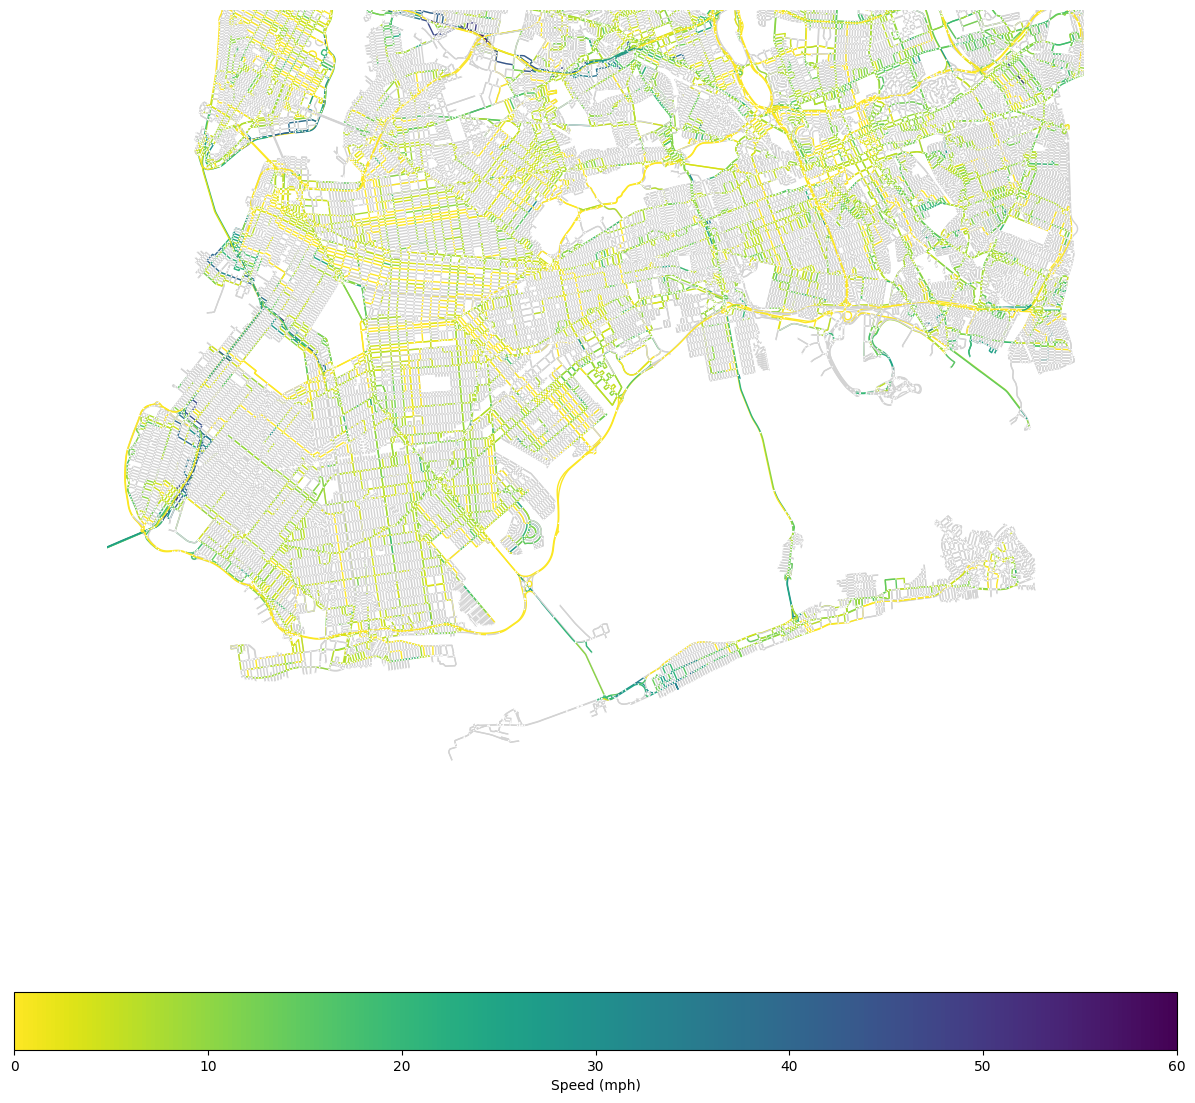

In [208]:
ec, sm = get_edge_colors(G_speed,'speed_mph_euclid_pre_rain',cmap='viridis_r',na_color='#d3d3d3')
fig,ax = ox.plot_graph(G_speed,node_size=1,edge_color=ec,bbox=(40.741481,40.537263,-73.722137,-74.047407),bgcolor='none',show=False,figsize=(15,15),edge_linewidth=1)
cb = fig.colorbar(sm,ax=ax,orientation='horizontal')
cb.set_label('Speed (mph)', fontsize=10)

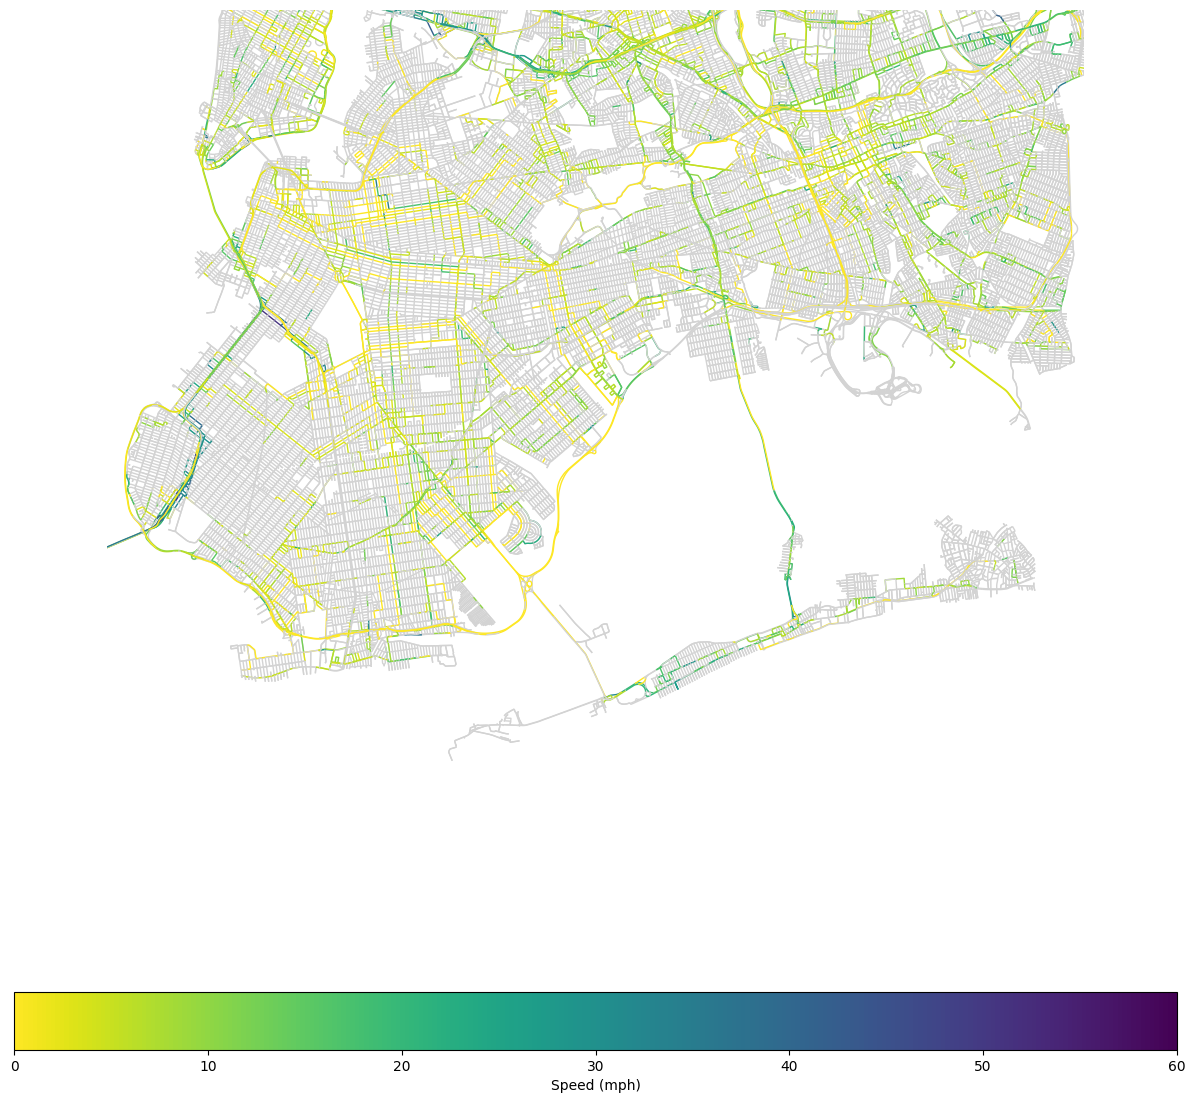

In [209]:
ec, sm = get_edge_colors(G_speed,'speed_mph_euclid_rain',cmap='viridis_r',na_color='#d3d3d3')
fig,ax = ox.plot_graph(G_speed,node_size=0,edge_color=ec,bbox=(40.741481,40.537263,-73.722137,-74.047407),bgcolor='none',show=False,figsize=(15,15),edge_linewidth=1)
cb = fig.colorbar(sm,ax=ax,orientation='horizontal')
cb.set_label('Speed (mph)', fontsize=10)

In [210]:
edges_w_speeds['speed_ratio'].quantile([0.05,0.1,0.15,0.5,0.8,0.9,0.95])

0.05    0.009189
0.10    0.180580
0.15    0.348774
0.50    0.882400
0.80    1.498616
0.90    2.363143
0.95    6.506759
Name: speed_ratio, dtype: float64

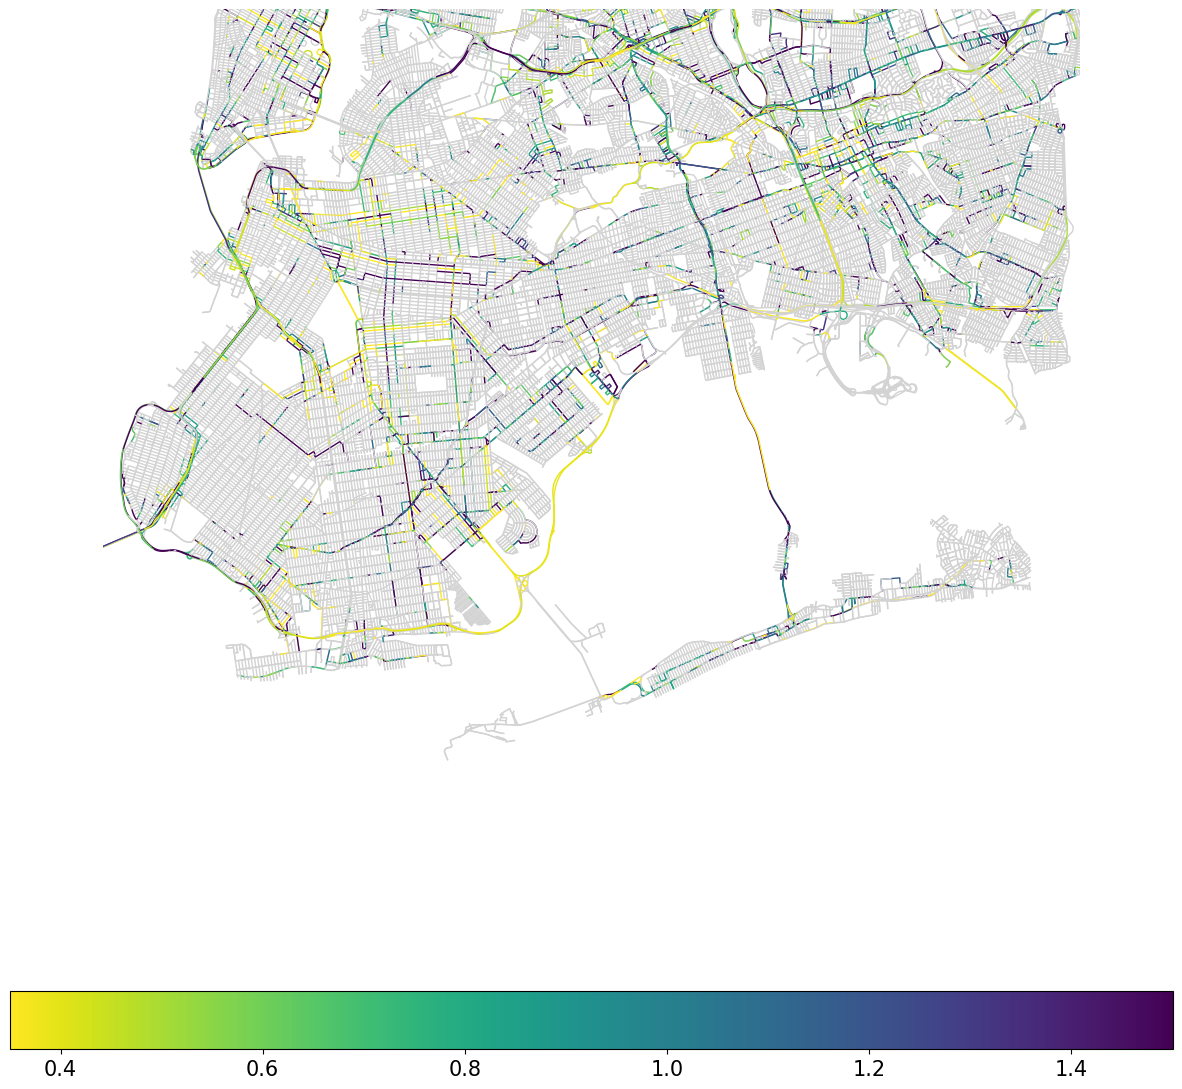

In [234]:
ec, sm = get_edge_colors(G_speed,'speed_ratio',v_min=0.35,v_max=1.5,cmap='viridis_r',na_color='#d3d3d3')
fig,ax = ox.plot_graph(G_speed,node_size=0,edge_color=ec,bgcolor='none',show=False,figsize=(15,15),edge_linewidth=1, bbox=(40.741481,40.537263,-73.722137,-74.047407))
cb = fig.colorbar(sm,ax=ax,orientation='horizontal')
cb.set_label('', fontsize=10)
cb.ax.tick_params(labelsize=15)
# Bklyn bbox=(40.741481,40.537263,-73.722137,-74.047407),

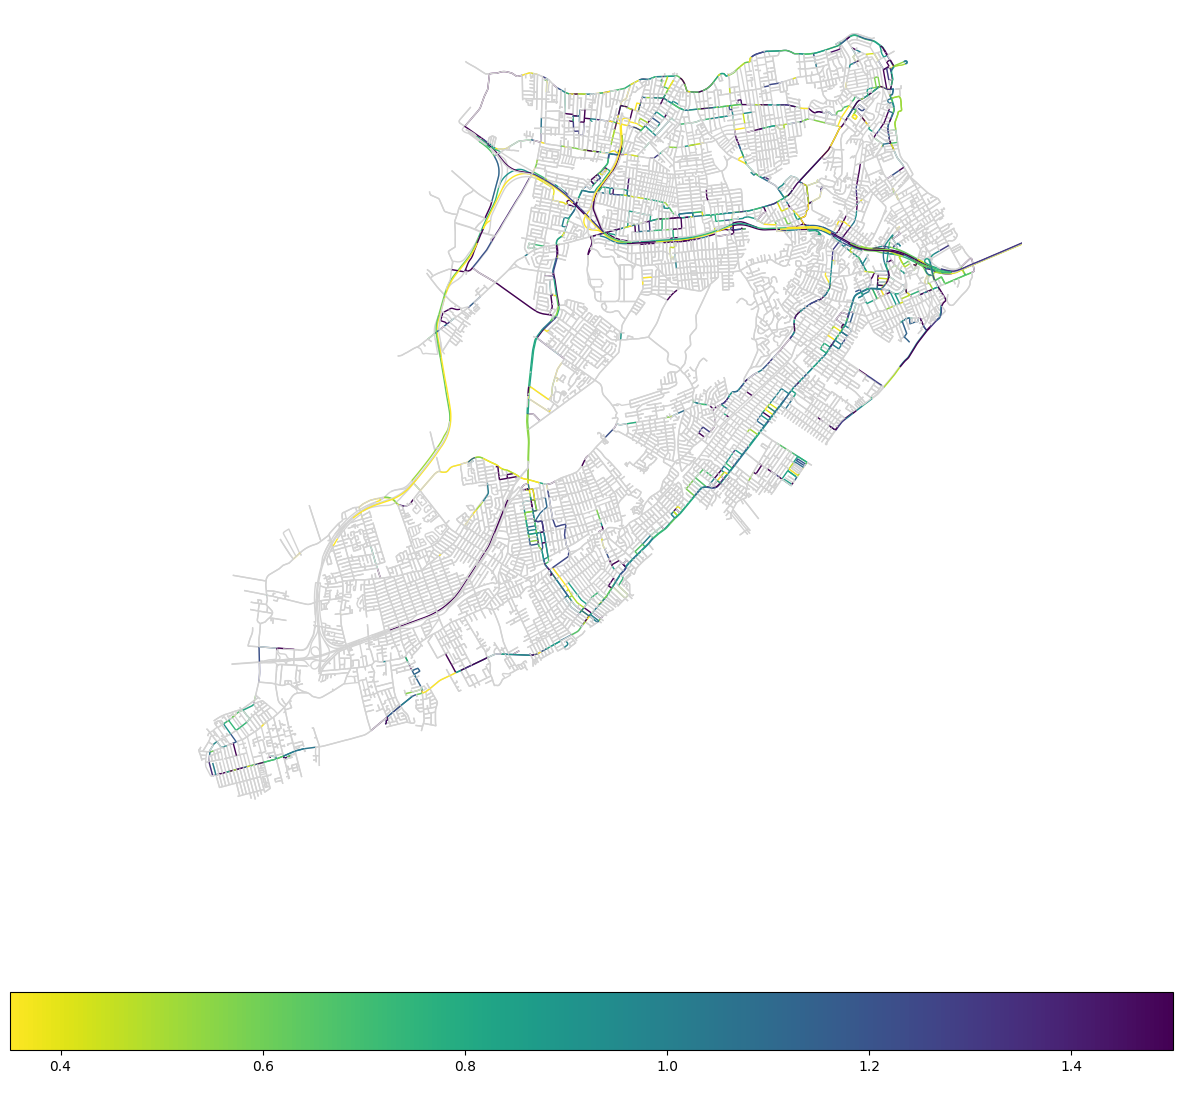

In [221]:
# Staten Island
bbox =(40.653372,40.494524,-74.042022,-74.264859)
# (40.741481,40.537263,-73.722137,-74.047407)
ec, sm = get_edge_colors(G_speed,'speed_ratio',v_min=0.35,v_max=1.5,cmap='viridis_r',na_color='#d3d3d3')
fig,ax = ox.plot_graph(G_speed,node_size=0,edge_color=ec,bgcolor='none',show=False,figsize=(15,15),edge_linewidth=1, bbox=bbox)
cb = fig.colorbar(sm,ax=ax,orientation='horizontal')
cb.set_label(' ', fontsize=10)
# Bklyn bbox=(40.741481,40.537263,-73.722137,-74.047407),

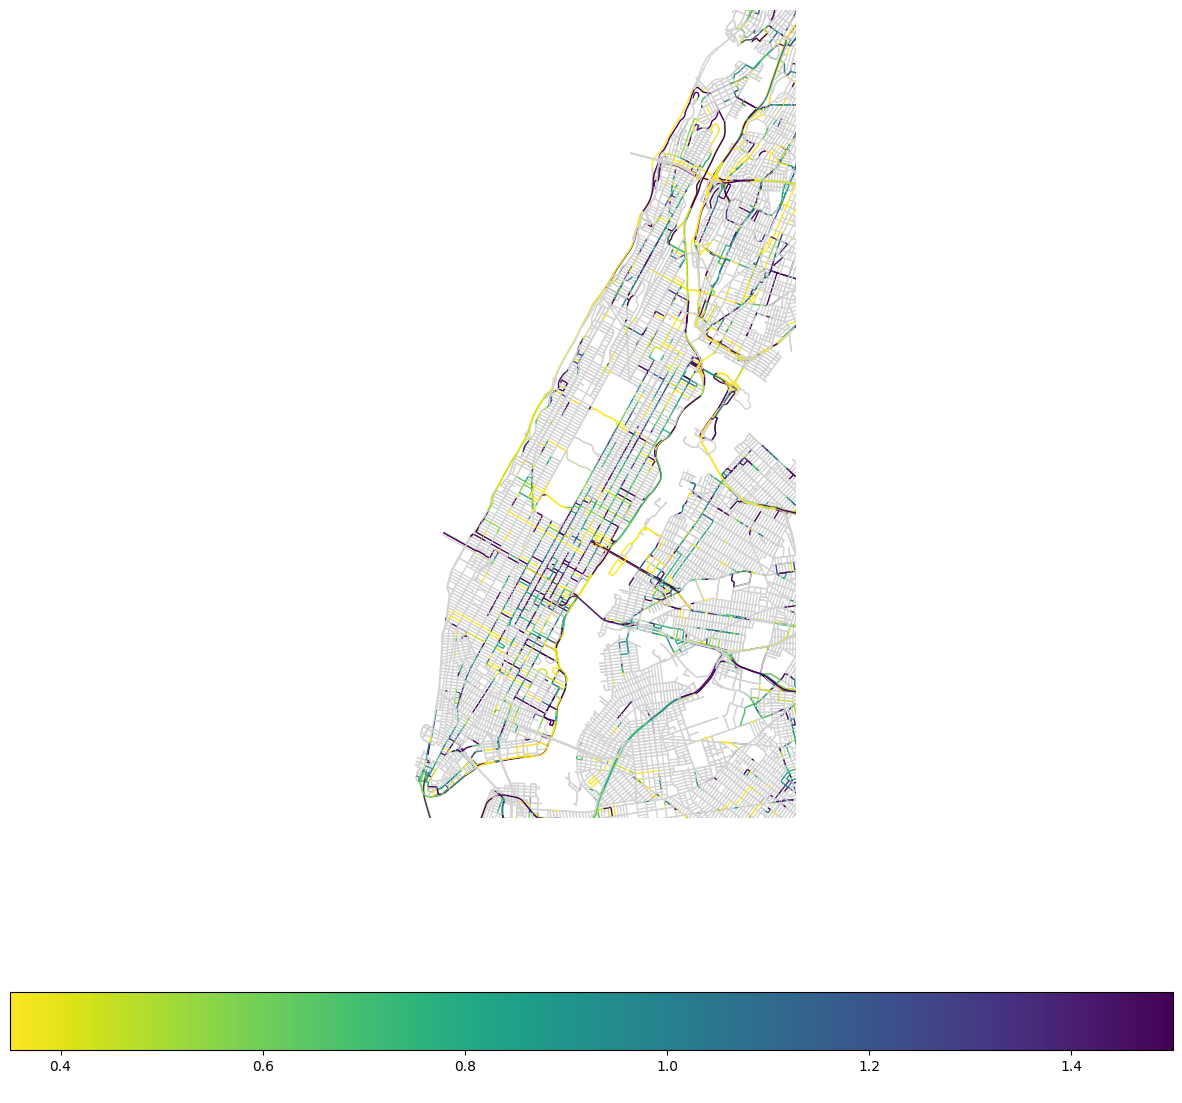

In [223]:
# Manhattan

bbox =(40.884973,40.69622,-73.901025,-74.027048)
# (40.741481,40.537263,-73.722137,-74.047407)
ec, sm = get_edge_colors(G_speed,'speed_ratio',v_min=0.35,v_max=1.5,cmap='viridis_r',na_color='#d3d3d3')
fig,ax = ox.plot_graph(G_speed,node_size=0,edge_color=ec,bgcolor='none',show=False,figsize=(15,15),edge_linewidth=1, bbox=bbox)
cb = fig.colorbar(sm,ax=ax,orientation='horizontal')
cb.set_label(' ', fontsize=10)

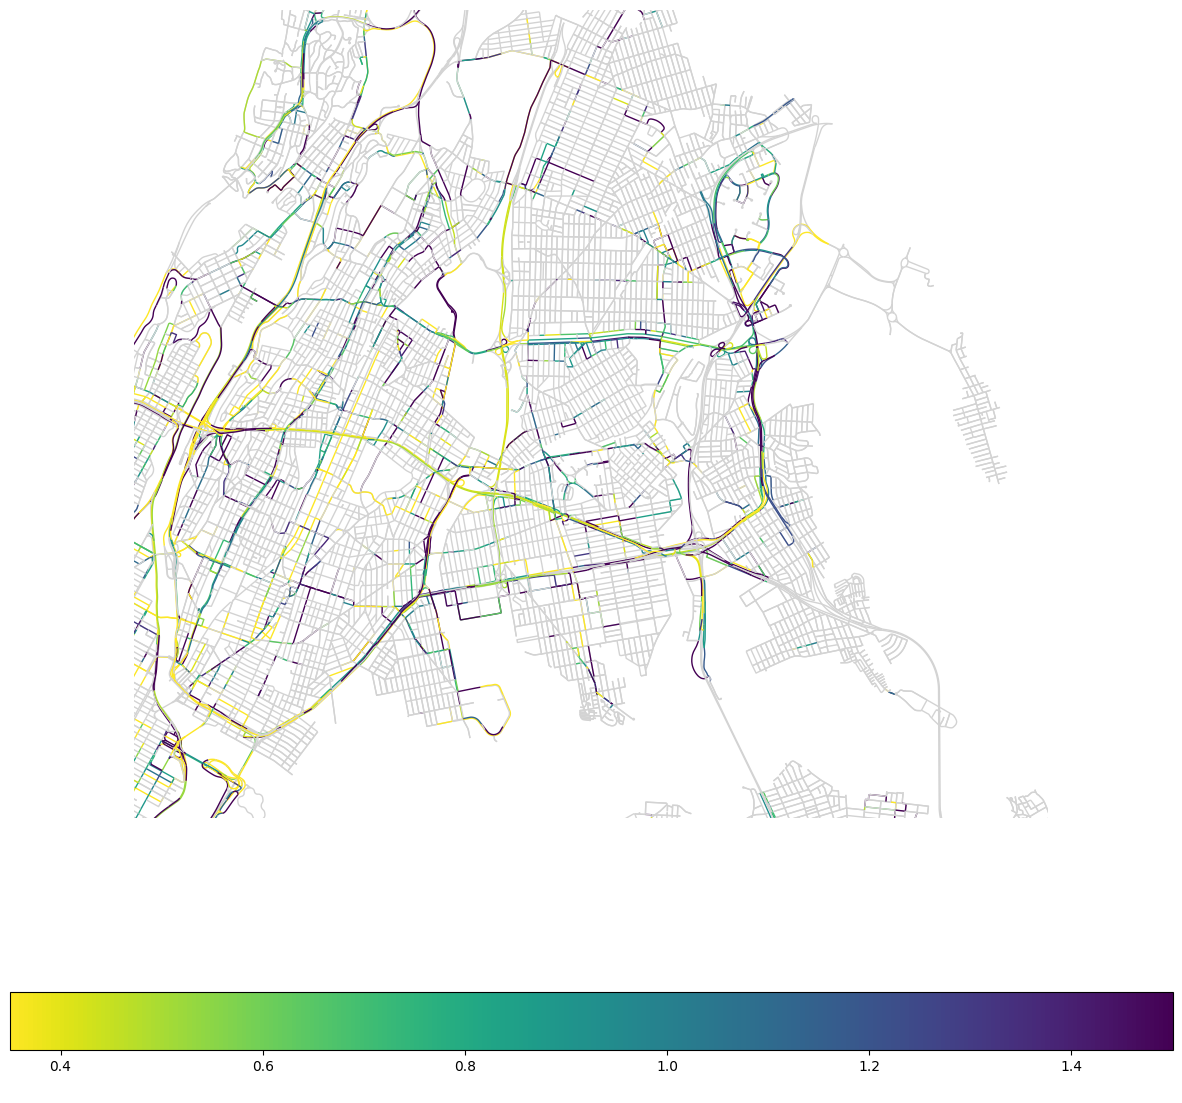

In [225]:
bbox =(40.902199,40.792159,-73.774079,-73.938447)
# (40.741481,40.537263,-73.722137,-74.047407)
ec, sm = get_edge_colors(G_speed,'speed_ratio',v_min=0.35,v_max=1.5,cmap='viridis_r',na_color='#d3d3d3')
fig,ax = ox.plot_graph(G_speed,node_size=0,edge_color=ec,bgcolor='none',show=False,figsize=(15,15),edge_linewidth=1, bbox=bbox)
cb = fig.colorbar(sm,ax=ax,orientation='horizontal')
cb.set_label(' ', fontsize=10)

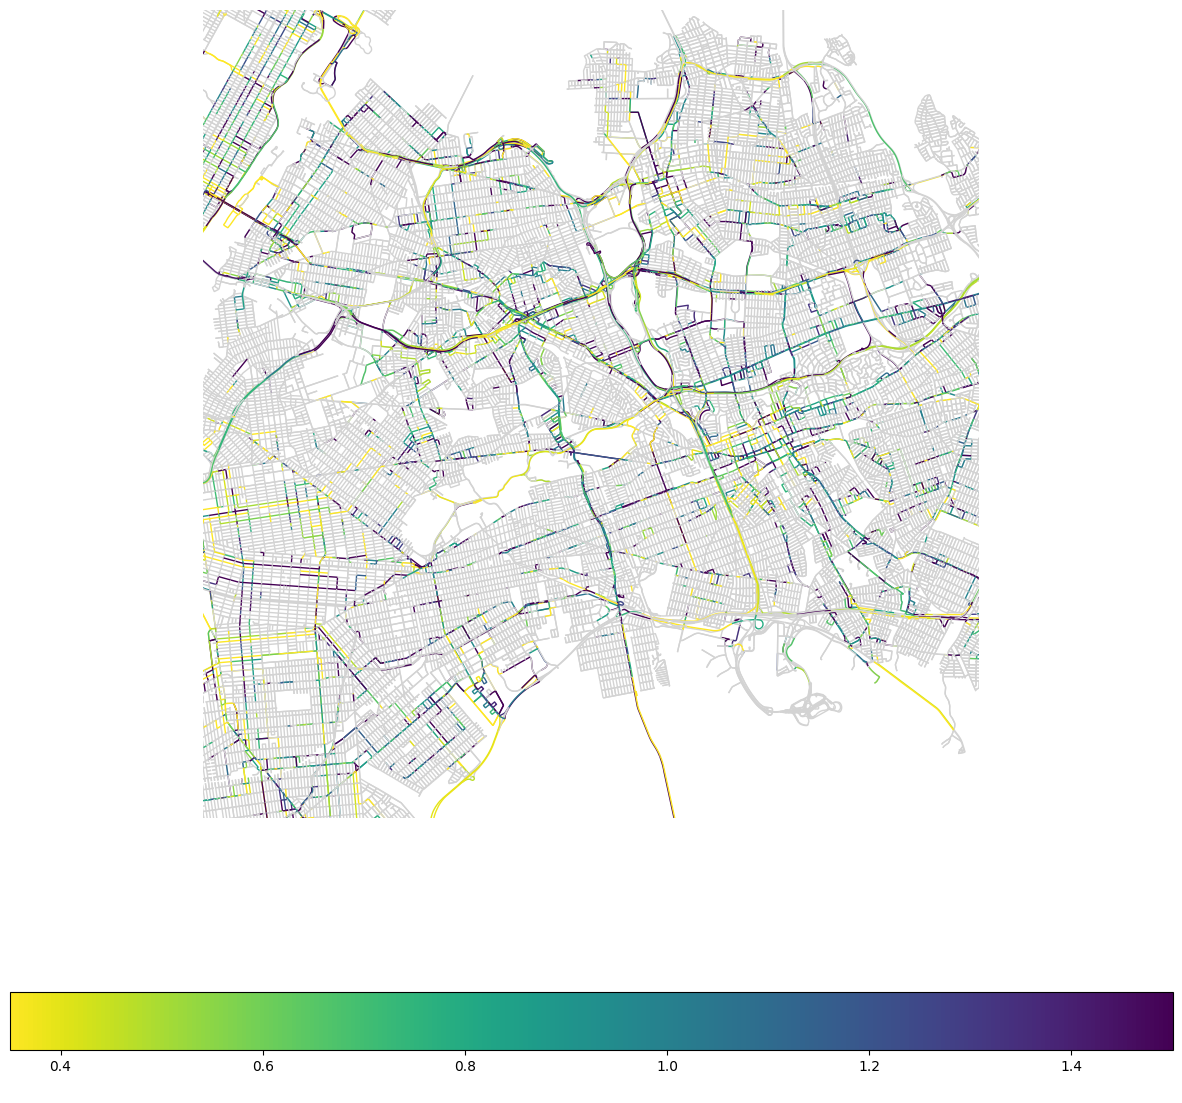

In [228]:
# Queens
bbox =(40.801505,40.620873,-73.735936,-73.964514)
# (40.741481,40.537263,-73.722137,-74.047407)
ec, sm = get_edge_colors(G_speed,'speed_ratio',v_min=0.35,v_max=1.5,cmap='viridis_r',na_color='#d3d3d3')
fig,ax = ox.plot_graph(G_speed,node_size=0,edge_color=ec,bgcolor='none',show=False,figsize=(15,15),edge_linewidth=1, bbox=bbox)
cb = fig.colorbar(sm,ax=ax,orientation='horizontal')
cb.set_label(' ', fontsize=10)

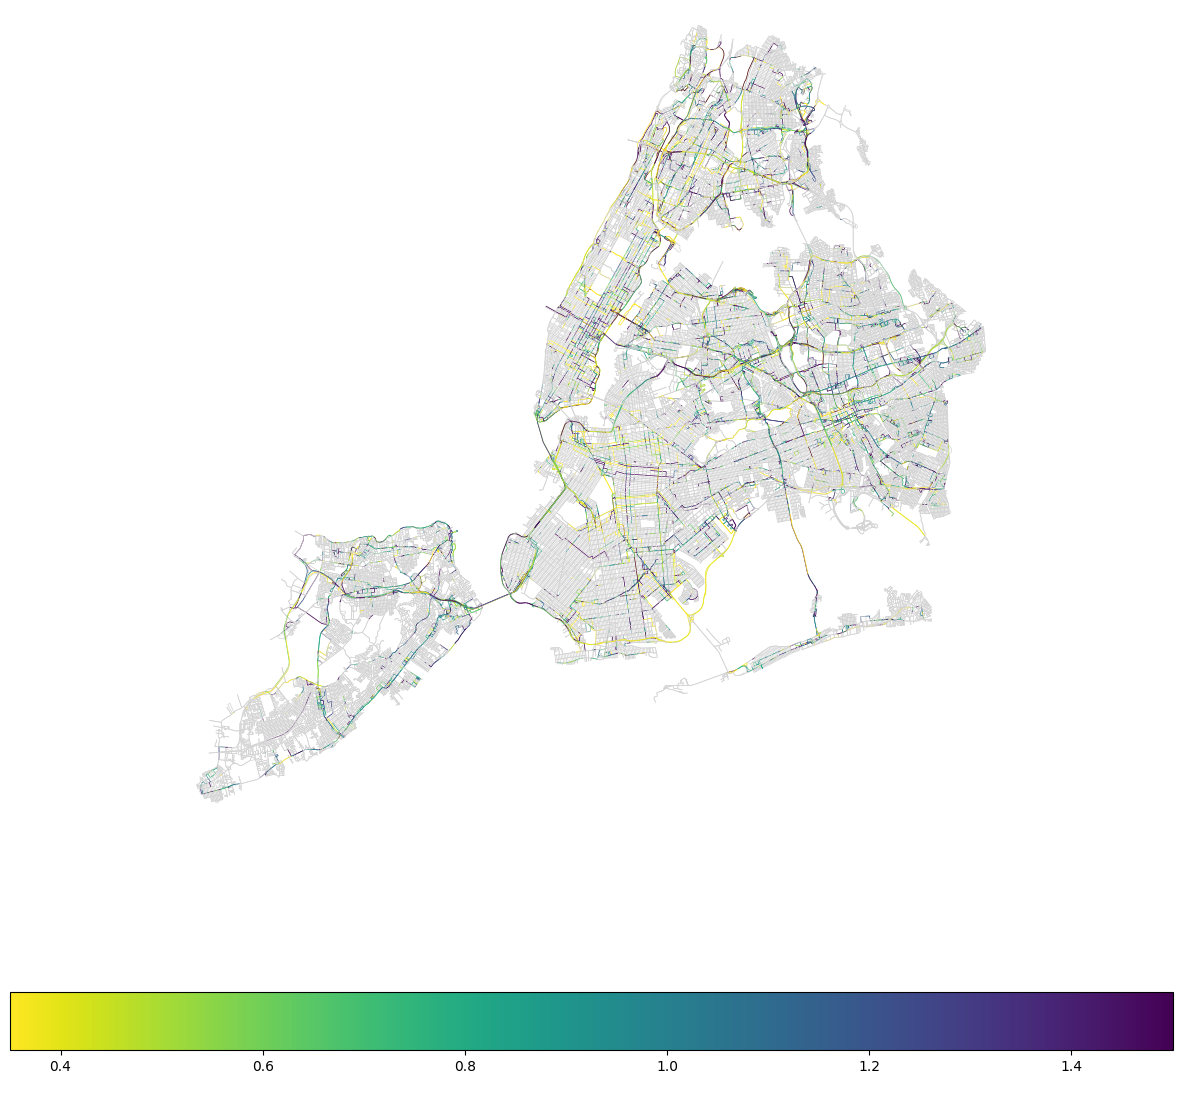

In [229]:
ec, sm = get_edge_colors(G_speed,'speed_ratio',v_min=0.35,v_max=1.5,cmap='viridis_r',na_color='#d3d3d3')
fig,ax = ox.plot_graph(G_speed,node_size=0,edge_color=ec,bgcolor='none',show=False,figsize=(15,15),edge_linewidth=0.5)
cb = fig.colorbar(sm,ax=ax,orientation='horizontal')
cb.set_label(' ', fontsize=10)
# Bklyn bbox=(40.741481,40.537263,-73.722137,-74.047407),